# Exploring 'imdb.mat'

In [1]:
from scipy.io import loadmat

In [2]:
annots = loadmat('imdb.mat')
print(annots)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Jan 17 11:30:27 2016', '__version__': '1.0', '__globals__': [], 'imdb': array([[(array([[693726, 693726, 693726, ..., 726831, 726831, 726831]], dtype=int32), array([[1968, 1970, 1968, ..., 2011, 2011, 2011]], dtype=uint16), array([[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43'),
                array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44'),
                array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43'),
                ...,
                array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44'),
                array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44'),
                array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]],
              dtype=object), array([[1., 1., 1., ..., 0., 0., 0.]]), array([[array(['Fred Astaire'], dtype='<U12'),
                array(['Fred Astaire'], dtype='<U12'

In [3]:
annots["imdb"]

array([[(array([[693726, 693726, 693726, ..., 726831, 726831, 726831]], dtype=int32), array([[1968, 1970, 1968, ..., 2011, 2011, 2011]], dtype=uint16), array([[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43'),
                array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44'),
                array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43'),
                ...,
                array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44'),
                array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44'),
                array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]],
              dtype=object), array([[1., 1., 1., ..., 0., 0., 0.]]), array([[array(['Fred Astaire'], dtype='<U12'),
                array(['Fred Astaire'], dtype='<U12'),
                array(['Fred Astaire'], dtype='<U12'), ...,
                array(['Jane Levy'], dtype='<U9'),
                array(['Jane Le

## Images

In [4]:
import pathlib

all_images = list(pathlib.Path("imdb_crop").glob("*/*.jpg"))
all_images[:10]

[PosixPath('imdb_crop/31/nm0000131_rm3318271744_1966-6-28_2014.jpg'),
 PosixPath('imdb_crop/31/nm0005031_rm991270912_1962-12-9_2004.jpg'),
 PosixPath('imdb_crop/31/nm0000131_rm3704206336_1966-6-28_2012.jpg'),
 PosixPath('imdb_crop/31/nm2557831_rm3839863552_1998-6-19_2012.jpg'),
 PosixPath('imdb_crop/31/nm0000131_rm1053609728_1966-6-28_2014.jpg'),
 PosixPath('imdb_crop/31/nm0001731_rm3478035200_1943-11-5_2005.jpg'),
 PosixPath('imdb_crop/31/nm2212031_rm911325440_1987-6-16_1975.jpg'),
 PosixPath('imdb_crop/31/nm0001131_rm2596713472_1966-1-13_2005.jpg'),
 PosixPath('imdb_crop/31/nm0000331_rm2754661376_1943-10-8_1989.jpg'),
 PosixPath('imdb_crop/31/nm0005031_rm3975333376_1962-12-9_2014.jpg')]

In [5]:
data_images = annots["imdb"][0][0][2][0]
data_images[:10]

array([array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43'),
       array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44'),
       array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43'),
       array(['01/nm0000001_rm946909184_1899-5-10_1968.jpg'], dtype='<U43'),
       array(['01/nm0000001_rm980463616_1899-5-10_1968.jpg'], dtype='<U43'),
       array(['02/nm0000002_rm1075631616_1924-9-16_1991.jpg'], dtype='<U44'),
       array(['02/nm0000002_rm1346607872_1924-9-16_2004.jpg'], dtype='<U44'),
       array(['02/nm0000002_rm1363385088_1924-9-16_2004.jpg'], dtype='<U44'),
       array(['02/nm0000002_rm1411175936_1924-9-16_1991.jpg'], dtype='<U44'),
       array(['02/nm0000002_rm1447271168_1924-9-16_2004.jpg'], dtype='<U44')],
      dtype=object)

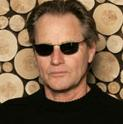

In [6]:
from PIL import Image

Image.open(all_images[5])

Used Later

In [7]:
def get_image(data_impath):
    image = "imdb_crop/" + data_impath
    return Image.open(image)

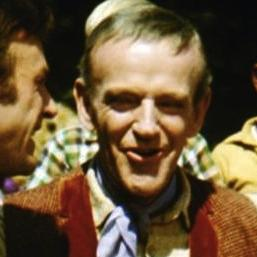

In [8]:
get_image(data_images[0][0])

## Names

In [9]:
annots["imdb"][0][0][4]

array([[array(['Fred Astaire'], dtype='<U12'),
        array(['Fred Astaire'], dtype='<U12'),
        array(['Fred Astaire'], dtype='<U12'), ...,
        array(['Jane Levy'], dtype='<U9'),
        array(['Jane Levy'], dtype='<U9'),
        array(['Jane Levy'], dtype='<U9')]], dtype=object)

In [10]:
import numpy as np

names = annots["imdb"][0][0][4][0]
unique_names = np.unique(names)

In [11]:
len(unique_names)

20284

In [12]:
unique_names.flatten().shape

(20284,)

In [13]:
def find_someone(name):
    if name in unique_names:
        print(f"{name} is in this dataset.")
        unique_name_index = list(unique_names).index(name)
        print(f"Unique Names Index: {unique_name_index}")

        overall_name_index = list(names).index(name)
        print(overall_name_index)
        data_impath = data_images[overall_name_index][0]
        
        return get_image(data_impath)
    else:
        print(f"{name} not in dataset.")

Russell Crowe is in this dataset.
Unique Names Index: 16831
10001


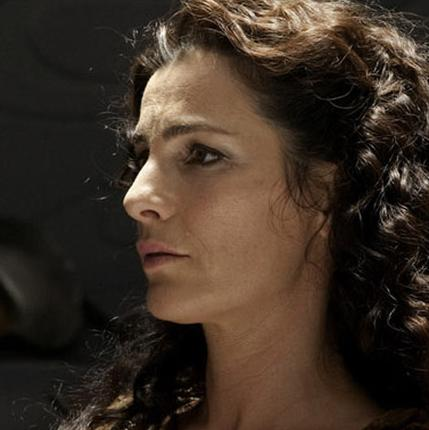

In [14]:
name = "Russell Crowe"

find_someone(name)

Well, that definitely is not Russell Crowe.

In [15]:
def search_name(chunk):
    for name in unique_names:
        if chunk in name[0]:
            print(name[0])

In [16]:
chunk = "Bobby"

search_name(chunk)

Bobby Brown
Bobby Campo
Bobby Cannavale
Bobby Coleman
Bobby Cooper
Bobby Darin
Bobby Deol
Bobby Di Cicco
Bobby Edner
Bobby Farrelly
Bobby Fischer
Bobby Flay
Bobby Lashley
Bobby Lee
Bobby Lockwood
Bobby Moynihan
Bobby Reed
Bobby Roth
Bobby Schofield
Bobby Troup


## Getting All Images per Name

In [17]:
unique_counts = np.unique(names, return_counts=True)

In [18]:
print(unique_counts[0][:10])
print(unique_counts[1][:10])

[array(["'Lee' George Quinones"], dtype='<U21')
 array(["'Weird Al' Yankovic"], dtype='<U19')
 array(['2 Chainz'], dtype='<U8') array(['50 Cent'], dtype='<U7')
 array(['A Martinez'], dtype='<U10') array(['A.D. Miles'], dtype='<U10')
 array(['A.J. Buckley'], dtype='<U12') array(['A.J. Cook'], dtype='<U9')
 array(['A.J. Johnson'], dtype='<U12')
 array(['A.J. Langer'], dtype='<U11')]
[  2  27   2 123   3   3  21  45   5   7]


In [19]:
def is_someone_in(name):
    if name in unique_names:
        return True
    else:
        return False

In [31]:
import math
import matplotlib.pyplot as plt

In [94]:
def print_all_images(name):
    if is_someone_in(name):
        unique_name_index = list(unique_counts[0]).index(name)
        overall_index = list(names).index(name)
        
        count = unique_counts[1][unique_name_index]
        size = math.ceil(np.sqrt(count))
        if size > 1:
            all_images = data_images[overall_index:overall_index+count]
            
            fig, axes = plt.subplots(nrows=size, ncols=size)
        
            pos = [0, 0]
            for image in all_images:
                image = "imdb_crop/" + image[0]
                image = Image.open(image)
                
                axes[pos[0], pos[1]].imshow(image)
                axes[pos[0], pos[1]].axis("off")
                if pos[1] < size-1:
                    pos[1] += 1
                    continue
                elif pos[1] == size-1:
                    pos[0] += 1
                    pos[1] = 0
                    continue
        
            print(name)
            print(f"{name} appears {count} times")
            plt.show()
        else:
            impath = "imdb_crop/" + data_images[overall_index][0]
            image = Image.open(impath)
            plt.imshow(image)
            plt.axis("off")
            plt.show()
    else:
        print("No puedo. Lo siento.")

Bobby Lee
Bobby Lee appears 9 times


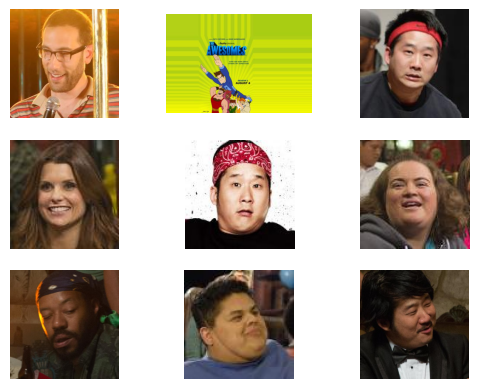

In [82]:
print_all_images("Bobby Lee")

Matthew McConaughey
Matthew McConaughey appears 567 times


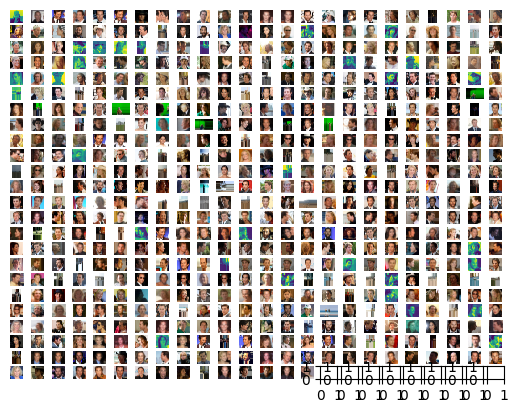

In [83]:
print_all_images("Matthew McConaughey")

Donald Trump
Donald Trump appears 29 times


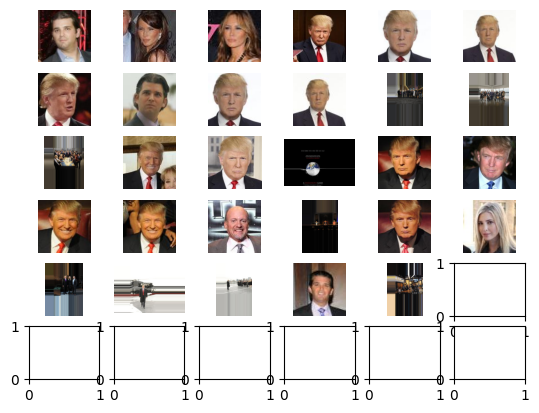

In [84]:
print_all_images("Donald Trump")

Joe Biden
Joe Biden appears 4 times


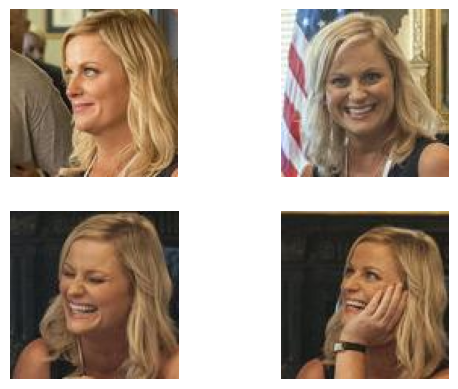

In [85]:
print_all_images("Joe Biden")

Angela Kinsey
Angela Kinsey appears 59 times


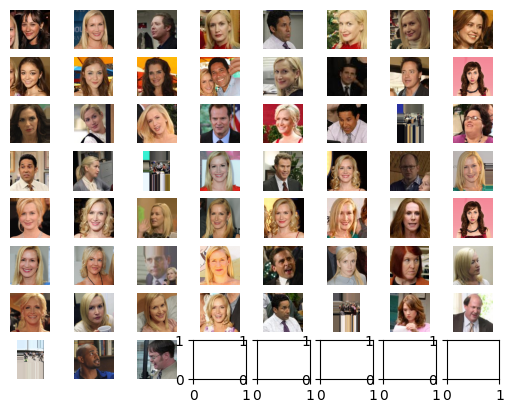

In [96]:
print_all_images("Angela Kinsey")

George Bush
George Bush appears 4 times


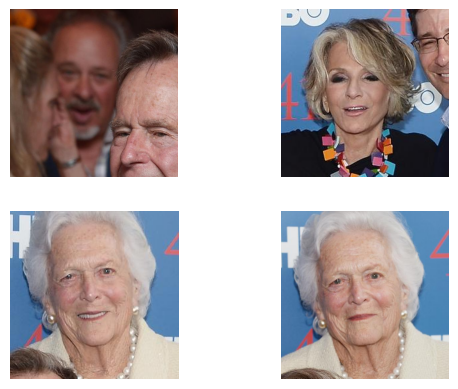

In [86]:
print_all_images("George Bush")

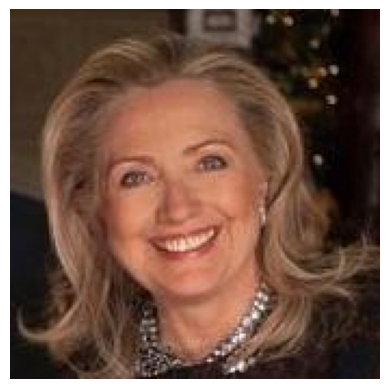

In [95]:
print_all_images("Hillary Clinton")

Russell Crowe
Russell Crowe appears 321 times


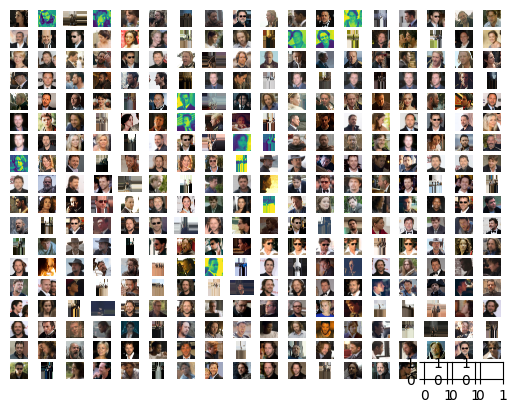

In [97]:
print_all_images("Russell Crowe")

Bill Clinton
Bill Clinton appears 5 times


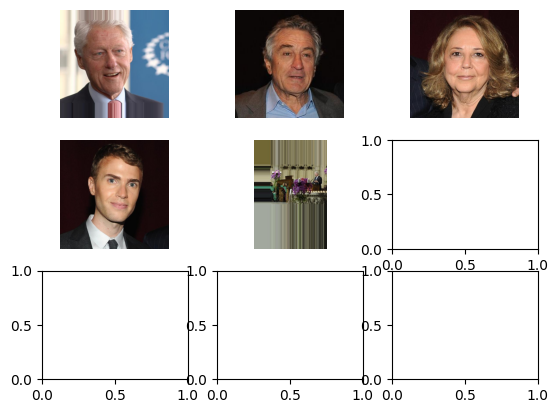

In [98]:
print_all_images("Bill Clinton")

## Findings

1. Not all images match the name, and some people don't even have one correct image (ahem Joe Biden)
2. Each person has a different amount of images. Some have hundreds, others have just one.
3. Not all the images are front-facing. This will lead to inconsistencies with FBP and with data collection if I use this data.
4. There are a lot of images. I only need one per person, but that is still 20,000+ people. I will have to use less.

Overall, this data would require a lot of manual cleaning to have every image be used for FBP. I may select some of the images in this dataset and use them for data collection, but not every single one.